In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def ComputeError(ref, result):
    if len(ref) != len(result) :
        print("LENGTH ERROR")
    
    return np.sqrt(np.mean(((ref - result)/ref) **2)/len(ref))

('errors shape : ', (10, 1, 4))


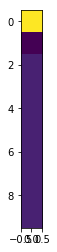

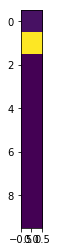

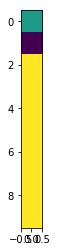

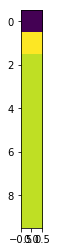

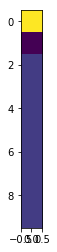

[[ 5.7826149 ]
 [ 5.3917497 ]
 [ 5.46051774]
 [ 5.46051929]
 [ 5.46051933]
 [ 5.46051947]
 [ 5.46052047]
 [ 5.46052105]
 [ 5.46052169]
 [ 5.46052186]]
(' min error : ', 5.3917497031773616)
(' min error acc cov : ', 0.011111111111111112)


In [81]:
acc_cov_points = 10
gyr_cov_points = 5

acc_cov_list = np.linspace(0,0.1, acc_cov_points) #(0.01, 0.025, 0.05, 0.1, 0.2)#
gyr_cov_list = np.array([0])#np.linspace(0,10, gyr_cov_points)

#print("acc cov list ", acc_cov_list)

errors = np.zeros([len(acc_cov_list), len(gyr_cov_list), 4])
print("errors shape : ", errors.shape)


for acc_idx in range(len(acc_cov_list)):
    acc_cov = acc_cov_list[acc_idx]
    
    for gyr_idx in range(len(gyr_cov_list)):
        
        gyr_cov = gyr_cov_list[gyr_idx]
        
        #print("running code with args ", acc_cov, gyr_cov)
        
        output = !/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov
        #!/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov

        reference_output = np.genfromtxt("/home/val/Desktop/CSVdata/CL_40_1_orientation.csv", delimiter=",", skip_header=1)
        gareth_output = np.genfromtxt("/home/val/Desktop/gareth_output.csv", delimiter=',')

        reference_quat = reference_output[:, 0:4]
        gareth_quat = gareth_output[:, 0:4]

        gareth_bias = gareth_output[:, 4:7]


        for i in range(4):
            errors[acc_idx, gyr_idx, i] = ComputeError(reference_quat[:,i], gareth_quat[:,i])      




#done loop
mean_error= np.mean(errors, axis=2)

for i in range(4):
    plt.imshow(errors[:,:,i])
    plt.show()

plt.imshow(mean_error)
plt.show()

print(mean_error)

min_error = np.min(mean_error)
min_error_index = np.argmin(mean_error)
min_acc_cov = acc_cov_list[min_error_index]

#x_index = min_error_index
print(" min error : ", min_error)
print(" min error acc cov : ", min_acc_cov)




('errors shape : ', (100, 4))
ERROR PER ELEMENT


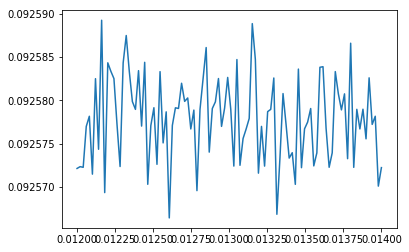

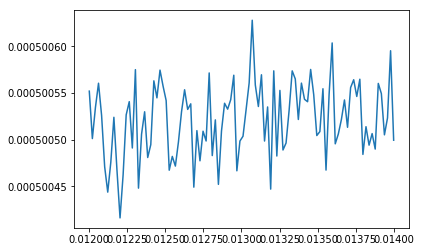

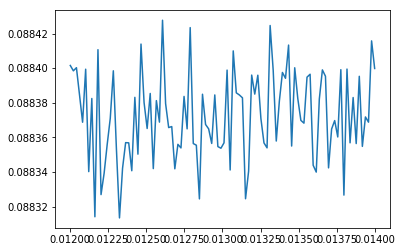

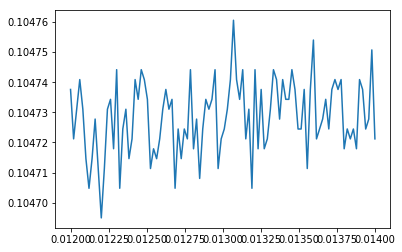

ERROR OVER TIME


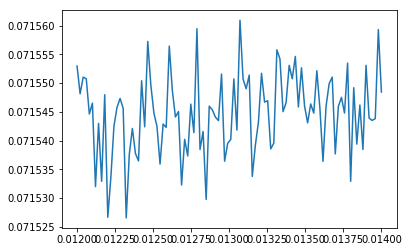

(' min error : ', 0.071526538503156586)
(' min error acc cov : ', 0.012323232323232323)


In [94]:
acc_cov_points = 100

acc_cov_list = np.linspace(0.012,0.014, acc_cov_points) #(0.01, 0.025, 0.05, 0.1, 0.2)#

gyr_cov = 0

#print("acc cov list ", acc_cov_list)

errors = np.zeros([len(acc_cov_list), 4])
print("errors shape : ", errors.shape)


for acc_idx in range(len(acc_cov_list)):
    acc_cov = acc_cov_list[acc_idx]
    
        
    #print("running code with args ", acc_cov, gyr_cov)

    output = !/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov
    #!/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov

    reference_output = np.genfromtxt("/home/val/Desktop/CSVdata/CL_40_1_orientation.csv", delimiter=",", skip_header=1)
    gareth_output = np.genfromtxt("/home/val/Desktop/gareth_output.csv", delimiter=',')

    reference_quat = reference_output[:, 0:4]
    gareth_quat = gareth_output[:, 0:4]
    
    final_gareth_quat = gareth_quat.copy()
    
    #axes transform
    final_gareth_quat[:,0] = -gareth_quat[:,3]
    final_gareth_quat[:,1] = -gareth_quat[:,2]
    final_gareth_quat[:,2] = gareth_quat[:,1]
    final_gareth_quat[:,3] = gareth_quat[:,0]


    gareth_bias = gareth_output[:, 4:7]


    for i in range(4):
        errors[acc_idx, i] = ComputeError(reference_quat[:,i], final_gareth_quat[:,i])      




#done loop
mean_error= np.mean(errors, axis=1)

print("ERROR PER ELEMENT")
for i in range(4):
    plt.plot(acc_cov_list, errors[:,i])
    plt.show()

print("ERROR OVER TIME")
plt.plot(acc_cov_list, mean_error)
plt.show()

min_error = np.min(mean_error)
min_error_index = np.argmin(mean_error)
min_acc_cov = acc_cov_list[min_error_index]

#x_index = min_error_index
print(" min error : ", min_error)
print(" min error acc cov : ", min_acc_cov)



------------------------------------------------------------------------
acc cov factor : 0.012
gyr cov factor : 0
acc noise : 0.000144
gyr noise : 0
init success
running filter on data
DONE !
final quat : (0.642708, 0.000708464, 0.763706, -0.0606526)
------------------------------------------------------------------------


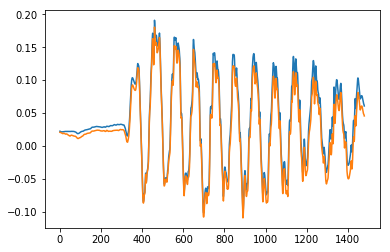

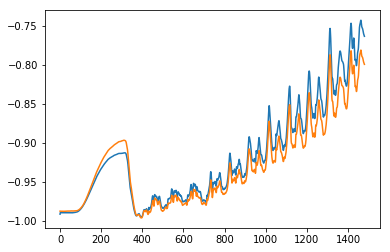

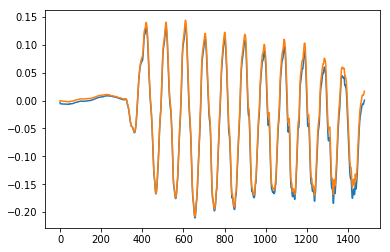

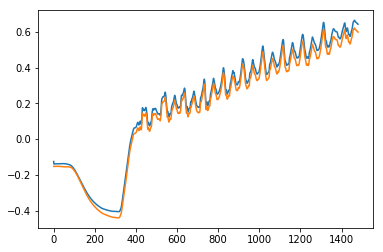

In [98]:
acc_cov = 0.012
gyr_cov = 0

!/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov

reference_output = np.genfromtxt("/home/val/Desktop/CSVdata/CL_40_1_orientation.csv", delimiter=",", skip_header=1)
gareth_output = np.genfromtxt("/home/val/Desktop/gareth_output.csv", delimiter=',')

reference_quat = reference_output[:, 0:4]
gareth_quat = gareth_output[:, 0:4]


final_gareth_quat = gareth_quat.copy()
    
#axes transform
final_gareth_quat[:,0] = -gareth_quat[:,3]
final_gareth_quat[:,1] = -gareth_quat[:,2]
final_gareth_quat[:,2] = gareth_quat[:,1]
final_gareth_quat[:,3] = gareth_quat[:,0]


for i in range(4):
    #plt.plot(gareth_quat[:,i])
    plt.plot(final_gareth_quat[:,i])
    plt.plot(reference_quat[:,i])
    plt.show()
    
#for i in range(3):
    #plt.plot(gareth_bias[:,i])
    #plt.show()